In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('../src')
from sk3d.data import io
from sk3d.data.dataset import ScenePaths

Setup paths to dataset files.

In [2]:
scene_paths = ScenePaths(
    scene_name='dragon',
    addons_dir='.../sk3d/addons',
)

Load depth maps.

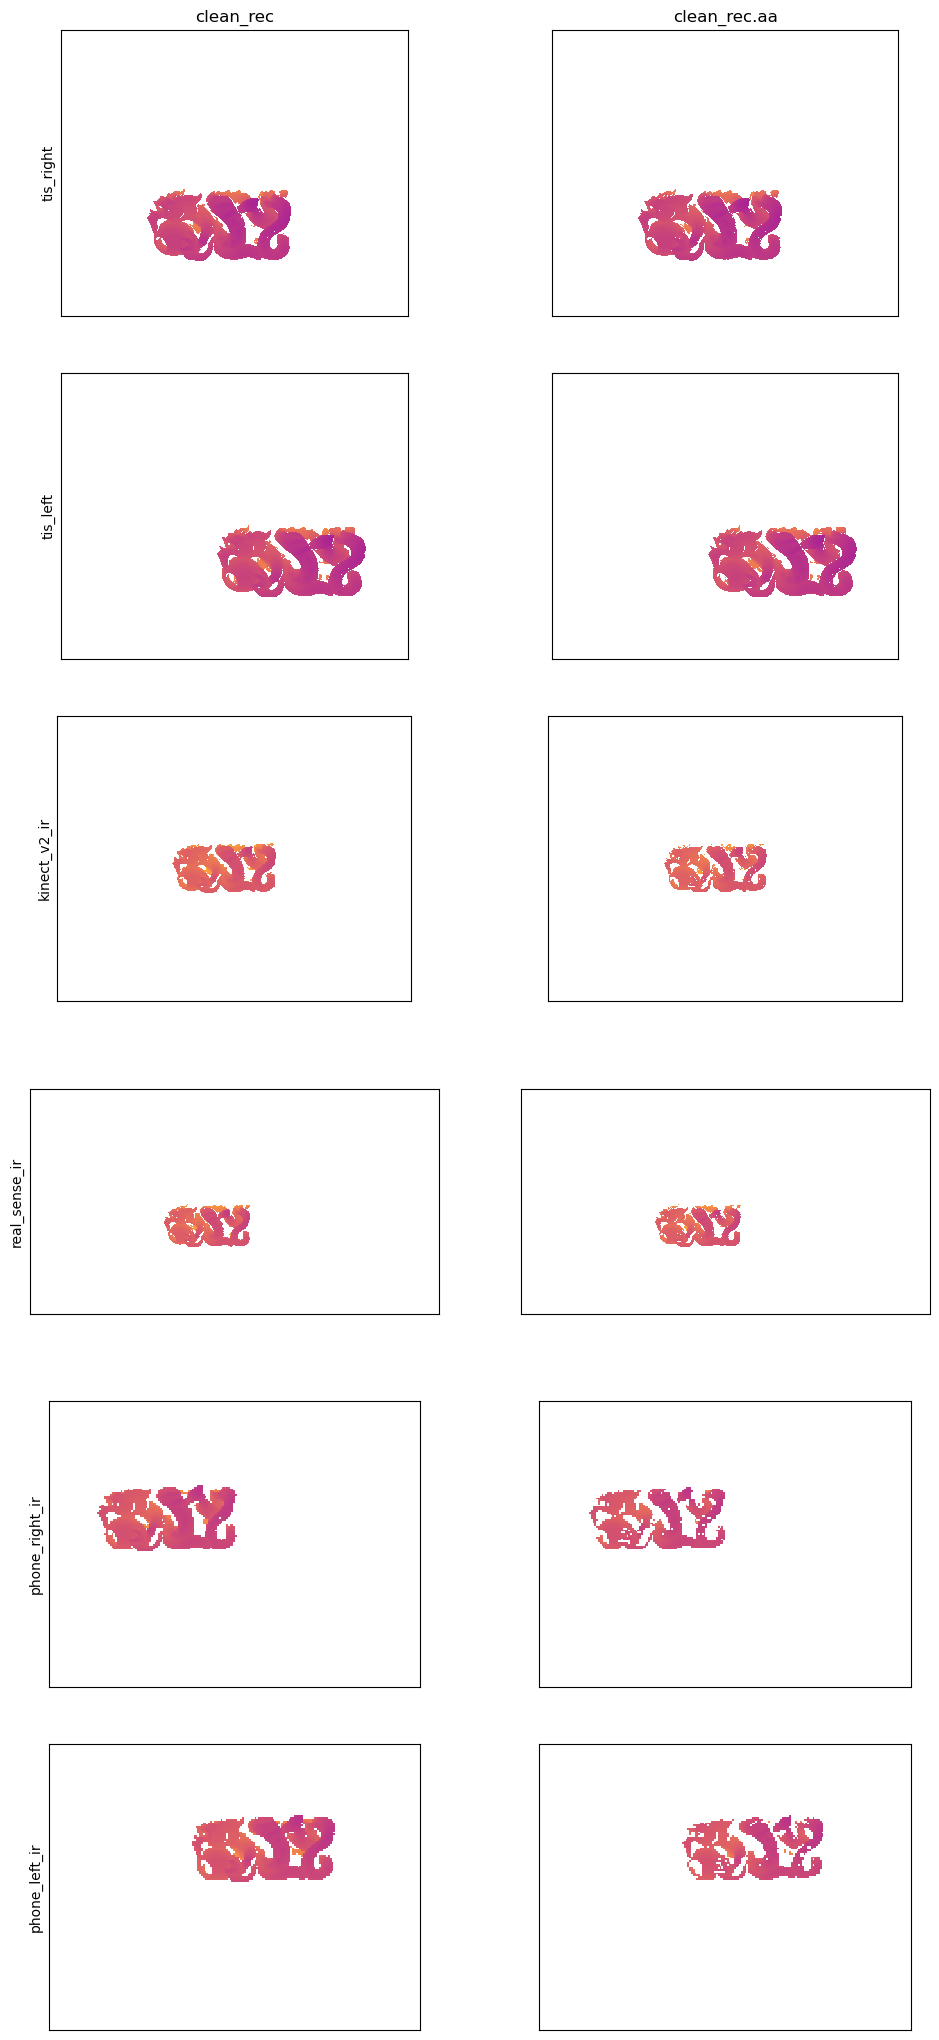

In [3]:
sensors = ['tis_right', 'tis_left', 'kinect_v2_ir', 'real_sense_ir', 'phone_right_ir', 'phone_left_ir']
variants = ['clean_rec', 'clean_rec.aa']
fig, axes = plt.subplots(len(sensors), len(variants), figsize=(9, 20))

for j, var in enumerate(variants):
    for sensor, ax in zip(sensors, axes[:, j]):
        img = scene_paths.proj_depth('stl', var, sensor, 'undist', 0)
        img = io.read_f32(img)
        ax.imshow(img, cmap='plasma', vmin=.5, vmax=.9, interpolation='none')

# Tune plots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
for j, var in enumerate(variants):
    axes[0, j].set_title(var)
for sensor, ax in zip(sensors, axes[:, 0]):
    ax.set_ylabel(sensor)
plt.subplots_adjust(0, 0, 1, 1)